#  Part A

CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. 
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a 
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.  
• DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or 
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and 
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is 
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),  
• 8086 "20s" blogs(ages 23-27) and  
• 2994 "30s" blogs (ages 33-47)  
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of 
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the 
date of the following post and links within a post are denoted by the label url link.  
• PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case 
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable

In [1]:
import tensorflow

In [2]:
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pip install langdetect


In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import re, string
from langdetect import detect, detect_langs
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

In [7]:
data = pd.read_csv(r'C:\Users\manve\Desktop\Great Learning\NLP\blogtext.csv')
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [9]:
print('Unique ids :' ,len(data['id'].unique()))
data['id'].unique()

Unique ids : 19320


array([2059027, 3581210, 3539003, ..., 3561647, 4260903, 1713845],
      dtype=int64)

In [10]:
print('Unique dates :' ,len(data['date'].unique()))
data['date'].unique()

Unique dates : 2616


array(['14,May,2004', '13,May,2004', '12,May,2004', ..., '05,august,2004',
       '04,august,2004', '02,august,2004'], dtype=object)

<AxesSubplot:>

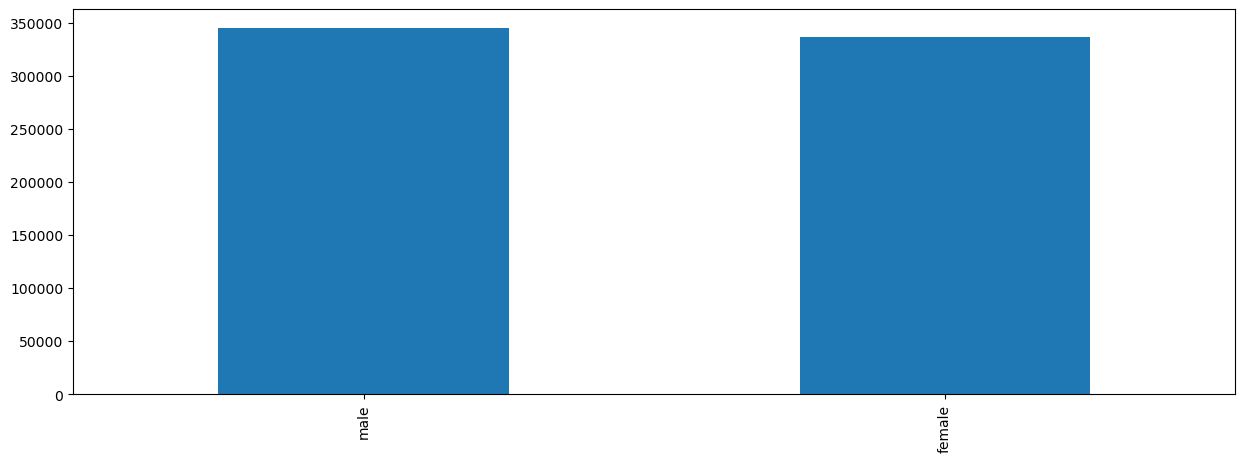

In [11]:
#Gender
data['gender'].value_counts().plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

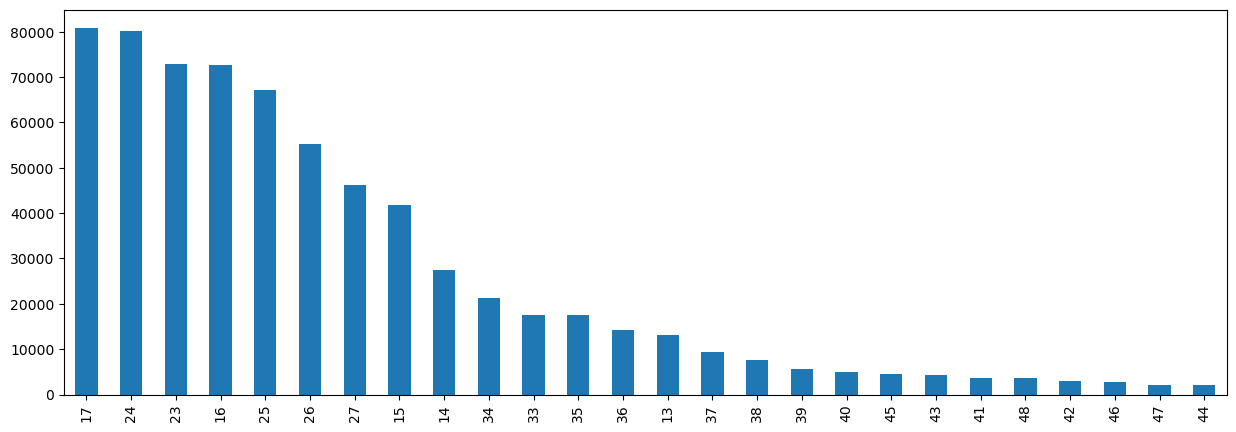

In [12]:
data['age'].value_counts().plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

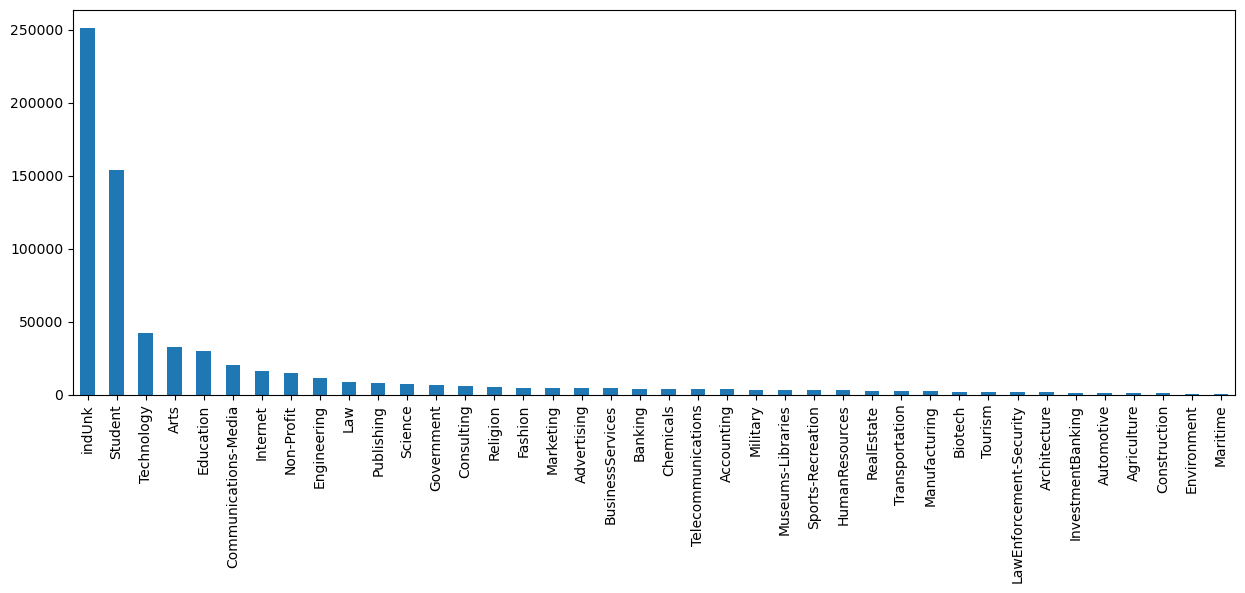

In [13]:
data['topic'].value_counts().plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

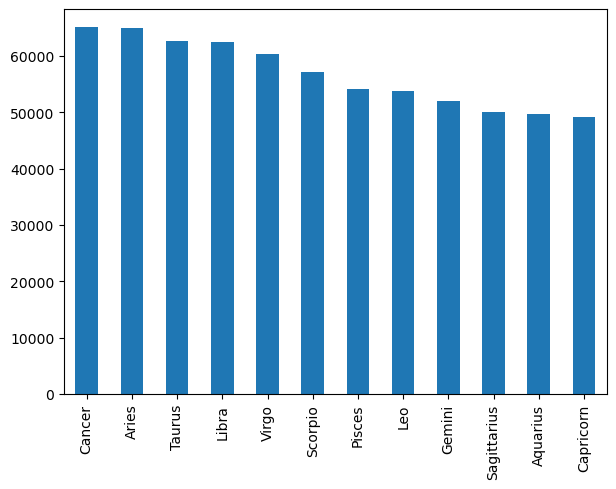

In [14]:
data['sign'].value_counts().plot(kind='bar', figsize=(7,5))

In [15]:

print('Unique topics :' ,len(data['topic'].unique()))
data['topic'].unique()

Unique topics : 40


array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

In [16]:
data['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [17]:
data = data.groupby("topic").sample(n=1000, replace=True,random_state=1).reset_index(drop=True)
data

,id,gender,age,topic,sign,date,text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als..."
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....
...,...,...,...,...,...,...,...
39995,2866266,male,13,indUnk,Taurus,"15,May,2004","anyway, i just woke up at 10:30 ..."
39996,4091963,female,39,indUnk,Leo,"30,June,2004",Giuliani to Cheney: 'Let's blast that ...
39997,91374,male,26,indUnk,Taurus,"21,March,2003",This just in from urlLink Apple : ...
39998,2250415,male,27,indUnk,Virgo,"08,July,2004",The Matrix Revolutions (WARNING The maj...


In [18]:
data['topic'].value_counts()

Accounting                 1000
Advertising                1000
LawEnforcement-Security    1000
Manufacturing              1000
Maritime                   1000
Marketing                  1000
Military                   1000
Museums-Libraries          1000
Non-Profit                 1000
Publishing                 1000
RealEstate                 1000
Religion                   1000
Science                    1000
Sports-Recreation          1000
Student                    1000
Technology                 1000
Telecommunications         1000
Tourism                    1000
Transportation             1000
Law                        1000
InvestmentBanking          1000
Internet                   1000
Chemicals                  1000
Agriculture                1000
Architecture               1000
Arts                       1000
Automotive                 1000
Banking                    1000
Biotech                    1000
BusinessServices           1000
Communications-Media       1000
HumanRes

There is no missing values found.  

Dataset consists of 6,81,284 blogs and for each blogger ID we are provided with gender, age, topic, sign, date and blog text.  

Blogger ID and Age are numerical, while the rest of columns are non-numerical

In [19]:
data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [20]:
data['emptystr'] = list(map(lambda x: not(x.isspace()), data['text']))

In [21]:
data = data[data['emptystr'] == True]
data = data.drop(['emptystr'], axis=1)

data.head()

,id,gender,age,topic,sign,date,text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als..."
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....


In [22]:
#To clean up a given string by removing URLs, special characters, numeric data entries, leading and trailing white spaces, and additional white spaces. 

def clean_str(string):
  try:   
    #URLs 
    string = re.sub(r'https?:\/\/.*[\r\n]*', '', string) 

    #special characters 
    string = re.sub(r'[\.;:,\?\"\'\/\=\-\*\&\@$\#\^\%\~\!\+\_\{\}\|\<\>\`]','', string)

    #numeric data entries
    string = re.sub(r'[0-9]','',string)  

    #leading and trailing whitespaces
    string = string.strip()

    #whitespaces
    words = string.strip().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)

  except:
    return ""

In [23]:
data['clean_text'] = data['text'].apply(clean_str)

data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39780 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          39780 non-null  int64 
 1   gender      39780 non-null  object
 2   age         39780 non-null  int64 
 3   topic       39780 non-null  object
 4   sign        39780 non-null  object
 5   date        39780 non-null  object
 6   text        39780 non-null  object
 7   clean_text  39780 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


In [25]:
# Removing null strings
empty_string_count = (data['clean_text'] == "").sum()
print("Count of empty strings in 'clean_text' column:", empty_string_count)

Count of empty strings in 'clean_text' column: 54


In [26]:
nan_value = float("NaN")
data['clean_text'].replace("", nan_value, inplace=True)
data.dropna(subset = ["clean_text"], inplace=True)
data


,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...
...,...,...,...,...,...,...,...,...
39995,2866266,male,13,indUnk,Taurus,"15,May,2004","anyway, i just woke up at 10:30 ...",anyway i just woke up at and my father asked m...
39996,4091963,female,39,indUnk,Leo,"30,June,2004",Giuliani to Cheney: 'Let's blast that ...,Giuliani to Cheney Lets blast that Nomar guy I...
39997,91374,male,26,indUnk,Taurus,"21,March,2003",This just in from urlLink Apple : ...,This just in from urlLink Apple We wanted you ...
39998,2250415,male,27,indUnk,Virgo,"08,July,2004",The Matrix Revolutions (WARNING The maj...,The Matrix Revolutions (WARNING The major plot...


In [27]:
data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...


In [28]:
data.reset_index(inplace = True, drop = True)  
data

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...
...,...,...,...,...,...,...,...,...
39721,2866266,male,13,indUnk,Taurus,"15,May,2004","anyway, i just woke up at 10:30 ...",anyway i just woke up at and my father asked m...
39722,4091963,female,39,indUnk,Leo,"30,June,2004",Giuliani to Cheney: 'Let's blast that ...,Giuliani to Cheney Lets blast that Nomar guy I...
39723,91374,male,26,indUnk,Taurus,"21,March,2003",This just in from urlLink Apple : ...,This just in from urlLink Apple We wanted you ...
39724,2250415,male,27,indUnk,Virgo,"08,July,2004",The Matrix Revolutions (WARNING The maj...,The Matrix Revolutions (WARNING The major plot...


In [29]:
#try
def detect_lang(text):
   try:
       return detect(text)
   except:
       return 'unknown'

In [30]:
data['lang_detect'] = data['clean_text'].apply(detect_lang)

English language entries 37967


<AxesSubplot:>

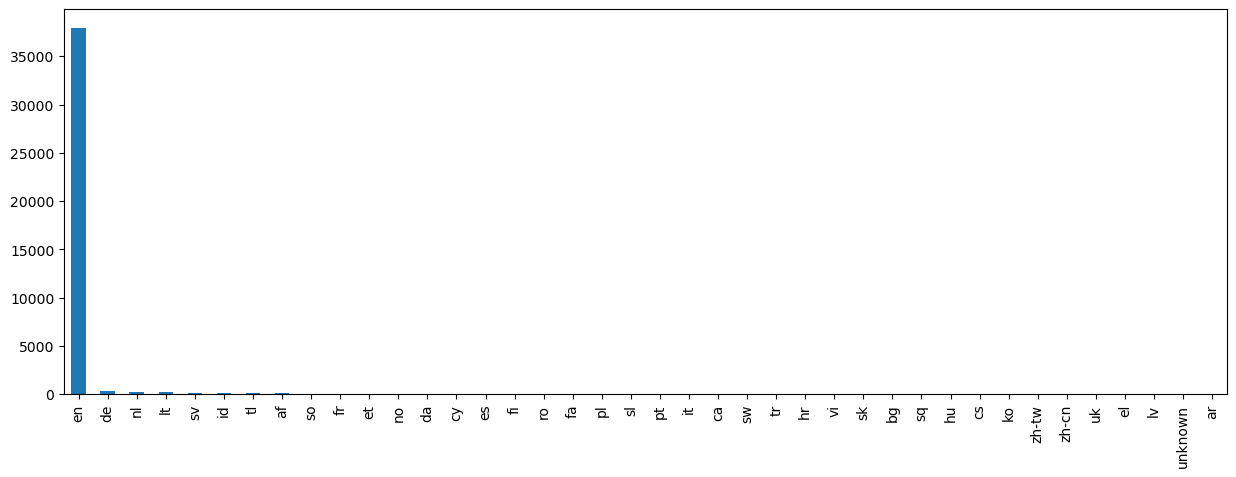

In [31]:
# Removing the rows for which either language could not be detected
print('English language entries',len(data[data['lang_detect']=='en']))


# Let's see the distribution
data['lang_detect'].value_counts().plot(kind='bar', figsize=(15,5))

In [32]:
data = data[data['lang_detect'] == 'en']
data['lang_detect'].value_counts()

en    37967
Name: lang_detect, dtype: int64

In [33]:
# Dropping the additional column
data = data.drop(['lang_detect'], axis=1)
data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,This friday is just going to be packed up My c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day I close on my house tomorrow It...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urlLink urlLink Hi everybody welcome to M...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,Hey Gals Its been awhilehope yall are doing gr...


In [34]:
data.reset_index(drop = True, inplace = True)

In [35]:

data['clean_text'] = data['clean_text'].apply(lambda s: s.lower())
data.head()

,id,gender,age,topic,sign,date,text,clean_text
0,732116,female,25,Accounting,Virgo,"28,October,2002",This friday is just going to be p...,this friday is just going to be packed up my c...
1,775493,male,23,Accounting,Cancer,"01,August,2004","so, i love the show scrubs. and, i als...",so i love the show scrubs and i also love zach...
2,732116,female,25,Accounting,Virgo,"03,December,2002",ugh what a day! I close on my h...,ugh what a day i close on my house tomorrow it...
3,3590584,male,23,Accounting,Capricorn,"12,June,2004",&nbsp; urlLink urlLink H...,nbsp urllink urllink hi everybody welcome to m...
4,1596188,female,46,Accounting,Sagittarius,"24,June,2004",Hey Gals! It's been awhile....,hey gals its been awhilehope yall are doing gr...


Stop words will be removed after tokenization



Classification model

In [36]:
# Extracting variables
X = data.clean_text
y = data.topic

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [38]:
print(X_train.shape)
print(y_train.shape)

(28475,)
(28475,)


In [39]:
print(X_test.shape)
print(y_test.shape)

(9492,)
(9492,)


Model Building

In [40]:
def print_confusion_matrix(testY, predicted_test_y):
    mat = confusion_matrix(testY, predicted_test_y)

    plt.figure(figsize=(10, 10))
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(testY),
                yticklabels=np.unique(testY))

    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

In [41]:
analyzer = CountVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [42]:
def get_lemmed_text(doc):
    return (lemmatizer.lemmatize(w) for w in analyzer(doc))

In [43]:
vect1 = CountVectorizer(analyzer=get_lemmed_text)

In [44]:
#nltk.download('omw-1.4')

In [45]:
vect1.fit(X_train)

#Vocabulary
print('The size of the vocabulary is :',len(vect1.get_feature_names()))

The size of the vocabulary is : 127099


In [46]:
vect1.get_feature_names()

['aa',
 'aaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaahhh',
 'aaaaaaaaaaaaaahhh',
 'aaaaaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaaaaaagh',
 'aaaaaaaaaaaah',
 'aaaaaaaaaaaahhhhhhhhhhhhhhh',
 'aaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaahhhhhhh',
 'aaaaaaaaaaauuugh',
 'aaaaaaaaaahhhhhh',
 'aaaaaaaaaahhhhhhhh',
 'aaaaaaaaahhhhhhhhhhhhhhhh',
 'aaaaaaaaarg',
 'aaaaaaaaargh',
 'aaaaaaaaarrrrrrrggggggggghhhhhhhhhhhh',
 'aaaaaaaahhhhhhhhh',
 'aaaaaaaand',
 'aaaaaaaargh',
 'aaaaaaall',
 'aaaaaaand',
 'aaaaaaanyways',
 'aaaaaahhhhhhh',
 'aaaaaand',
 'aaaaaargghh',
 'aaaaaarhgh',
 'aaaaaarrrggghhh',
 'aaaaaaw',
 'aaaaaghhhhh',
 'aaaaah',
 'aaaaahhhhhh',
 'aaaaahhhhhhh',
 'aaaaahhhhhhhh',
 'aaaaahhhhhwwooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo',
 'aaaaand',
 'aaaaanyway',
 'aaaaanyways',
 'aaaages',
 'aaaaggghhhhh',
 'aaaaggh',
 'aaaagh',
 'aaaah',
 'aaaahhh',
 'aaaahhhh',
 'aaaahhhhhhh',
 'aaaall',
 

In [47]:
X_train_ct = vect1.transform(X_train)

In [48]:
X_train_ct.shape

(28475, 127099)

In [49]:
X_test_ct = vect1.transform(X_test)

In [50]:
X_test_ct.shape

(9492, 127099)

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train_ct, y_train)

KNeighborsClassifier()

In [53]:
ypred_train_m1 = knn.predict(X_train_ct)

In [54]:
metrics.accuracy_score(y_train, ypred_train_m1)

0.36769095697980686

In [55]:
ypred_test_m1 = knn.predict(X_test_ct)

In [56]:
metrics.accuracy_score(y_test, ypred_test_m1)

0.1286346396965866

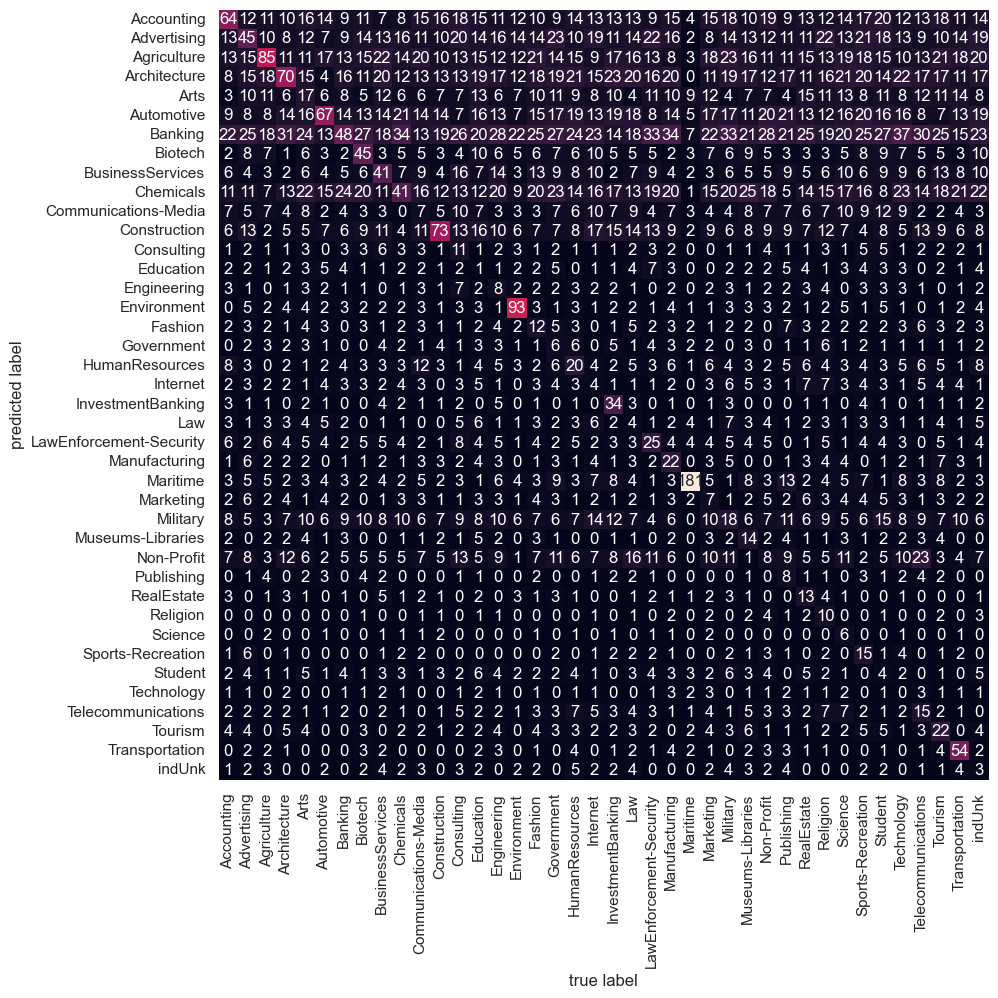

In [57]:
print_confusion_matrix(y_test, ypred_test_m1 )

Model 2 

In [58]:
svc = SVC()
svc.fit(X_train_ct, y_train)

SVC()

In [59]:
ypred_train_m2 = svc.predict(X_train_ct)


In [60]:
metrics.accuracy_score(y_train, ypred_train_m2)


0.5178928884986831

In [61]:
ypred_test_m2 = svc.predict(X_test_ct)


In [62]:
metrics.accuracy_score(y_test, ypred_test_m2)


0.18647281921618206

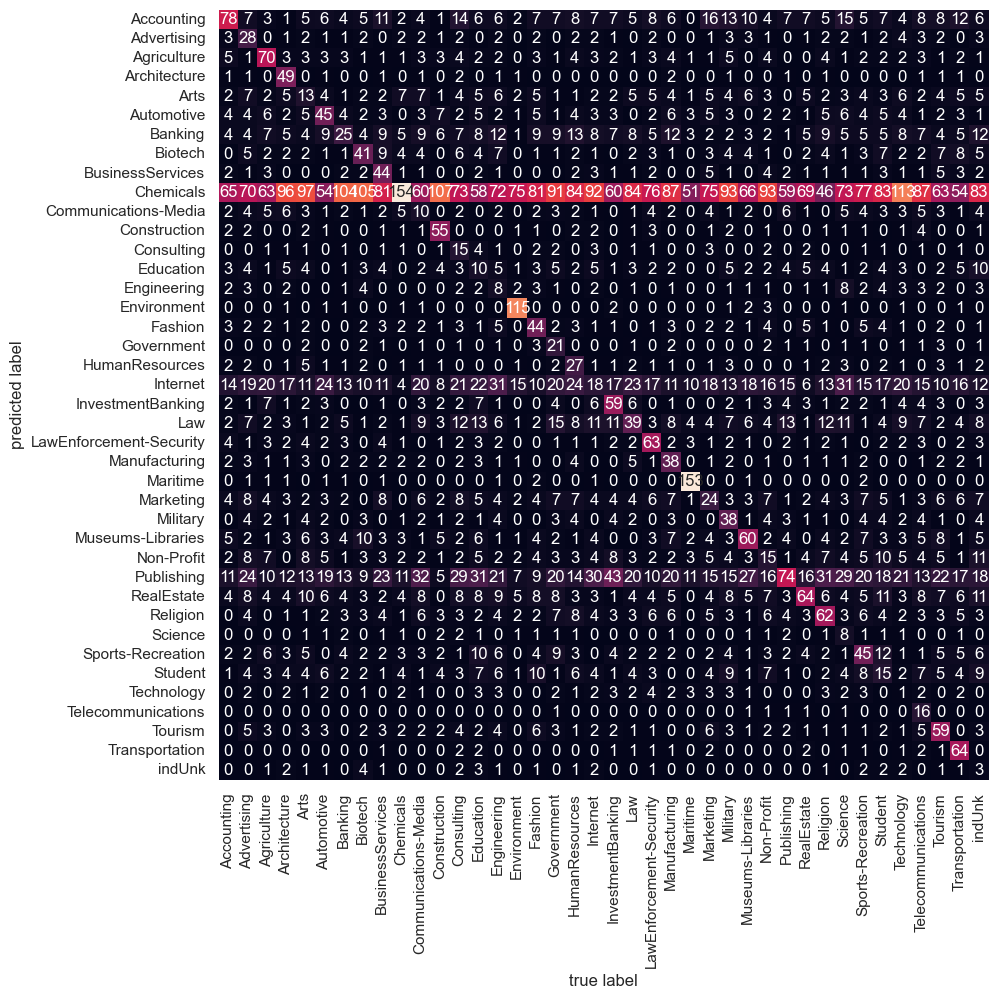

In [63]:
print_confusion_matrix(y_test, ypred_test_m2)


Model 3

In [64]:

analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [65]:
lemm_tvectorizer = TfidfVectorizer(analyzer=get_lemmed_text)


In [66]:
lemm_tvectorizer.fit(X_train)

#Vocabulary
len(lemm_tvectorizer.get_feature_names())

127099

In [67]:
X_train_ct = lemm_tvectorizer.transform(X_train)
X_test_ct = lemm_tvectorizer.transform(X_test)

In [68]:
svc = SVC()
svc.fit(X_train_ct, y_train)

SVC()

In [69]:
ypred_train_m3 = svc.predict(X_train_ct)


In [70]:
metrics.accuracy_score(y_train, ypred_train_m3)


0.9821949078138719

In [71]:
ypred_test_m3 = svc.predict(X_test_ct)


In [72]:
metrics.accuracy_score(y_test, ypred_test_m3)


0.35461441213653605

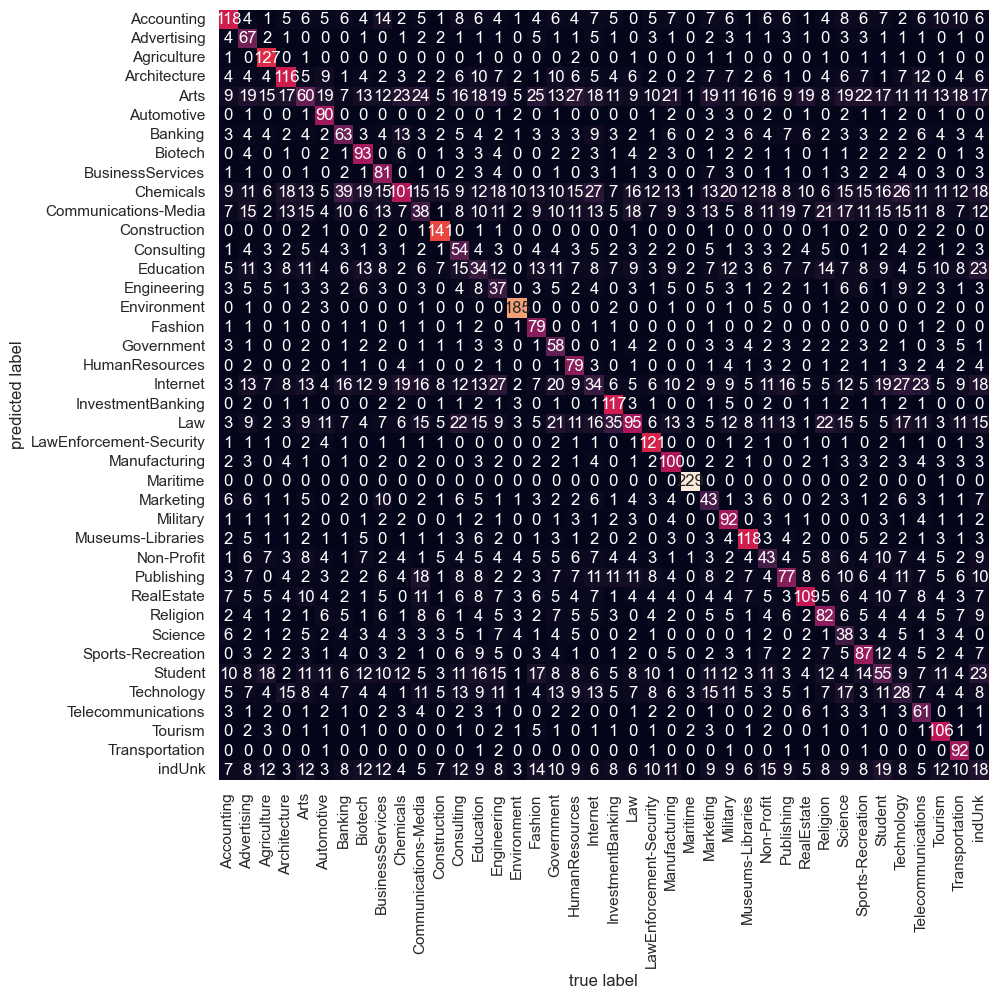

In [73]:
print_confusion_matrix(y_test, ypred_test_m3)


In [74]:
analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [75]:
vect3 = TfidfVectorizer(analyzer=get_lemmed_text)


In [76]:
vect3.fit(X_train)

#Vocabulary
print('The size of the vocabulary is :',len(vect3.get_feature_names()))

The size of the vocabulary is : 127099


In [77]:
X_train_ct = vect3.transform(X_train)

In [78]:
X_test_ct = vect3.transform(X_test)

In [79]:

parameter_candidates = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],                                         
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

In [80]:
clf_test = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

clf_test.fit(X_train_ct, y_train) 

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [81]:

# View the accuracy score
print('Best score for data:', clf_test.best_score_) 

print('Best C:',clf_test.best_estimator_.C) 
print('Best Kernel:',clf_test.best_estimator_.kernel)
print('Best Gamma:',clf_test.best_estimator_.gamma)

Best score for data: 0.3305355575065848
Best C: 10
Best Kernel: rbf
Best Gamma: 1


In [82]:
svc_new = SVC(C=10, kernel='rbf', gamma=1)
svc_new.fit(X_train_ct, y_train)

SVC(C=10, gamma=1)

In [83]:
ypred_train_m3 = svc_new.predict(X_train_ct)


In [84]:
metrics.accuracy_score(y_train, ypred_train_m3)


0.9907989464442494

In [85]:
ypred_test_m3 = svc_new.predict(X_test_ct)


In [86]:
metrics.accuracy_score(y_test, ypred_test_m3)


0.37094395280235987

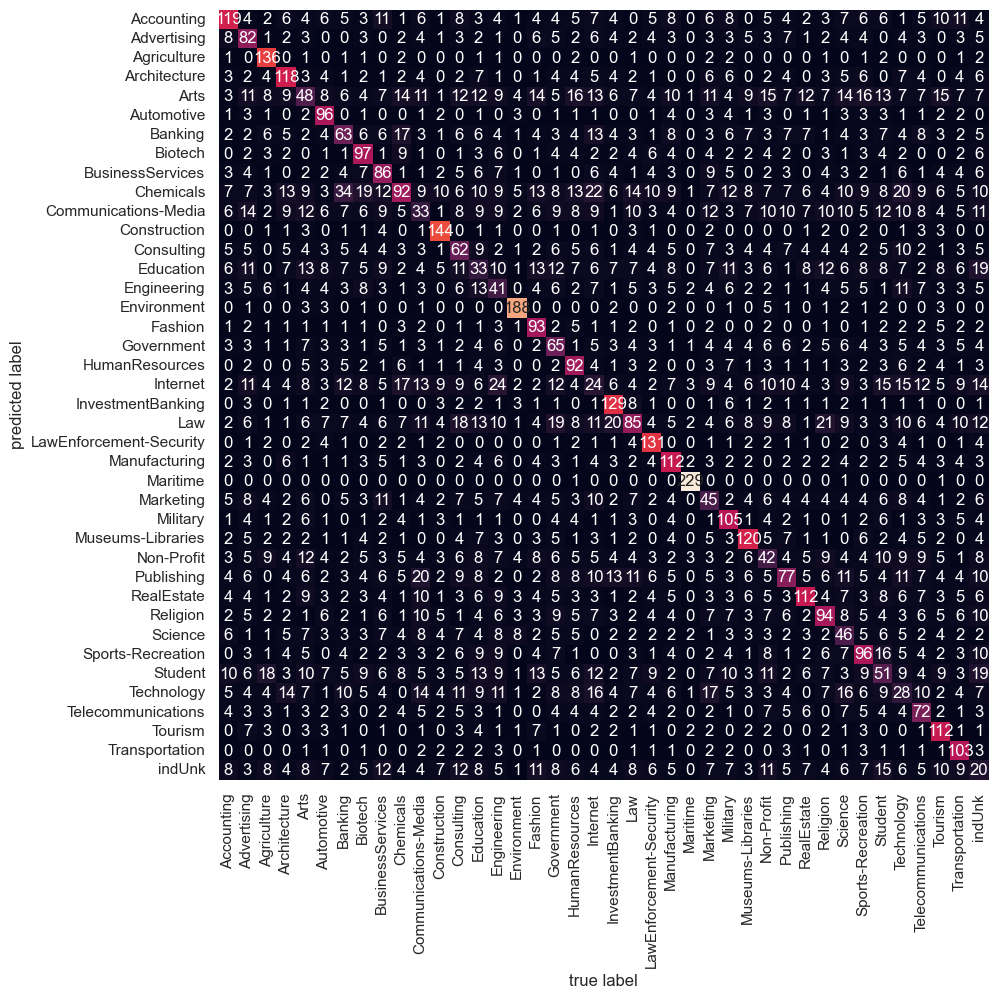

In [87]:
print_confusion_matrix(y_test, ypred_test_m3)


In [88]:
analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
lemmatizer = WordNetLemmatizer()

In [89]:
vect3 = TfidfVectorizer(analyzer=get_lemmed_text)

In [90]:
vect3.fit(X_train)

#Vocabulary
print('The size of the vocabulary is :',len(vect3.get_feature_names()))

The size of the vocabulary is : 127099


In [91]:
X_train_ct = vect3.transform(X_train)


In [92]:
X_test_ct = vect3.transform(X_test)


In [93]:
parameter_candidates = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],                                         
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

In [94]:
clf_test = GridSearchCV(estimator=svc, param_grid=parameter_candidates, n_jobs=-1)

clf_test.fit(X_train_ct, y_train) 

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [95]:
print('Best score for data:', clf_test.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf_test.best_estimator_.C) 
print('Best Kernel:',clf_test.best_estimator_.kernel)
print('Best Gamma:',clf_test.best_estimator_.gamma)

Best score for data: 0.3305355575065848
Best C: 10
Best Kernel: rbf
Best Gamma: 1


In [96]:
#Train an SVM with default parameters
svc_new = SVC(C=10, kernel='rbf', gamma=1)
svc_new.fit(X_train_ct, y_train)

SVC(C=10, gamma=1)

In [97]:
ypred_train_m3 = svc_new.predict(X_train_ct)


In [98]:
metrics.accuracy_score(y_train, ypred_train_m3)


0.9907989464442494

In [99]:
ypred_test_m3 = svc_new.predict(X_test_ct)


In [101]:
metrics.accuracy_score(y_test, ypred_test_m3)

0.37094395280235987

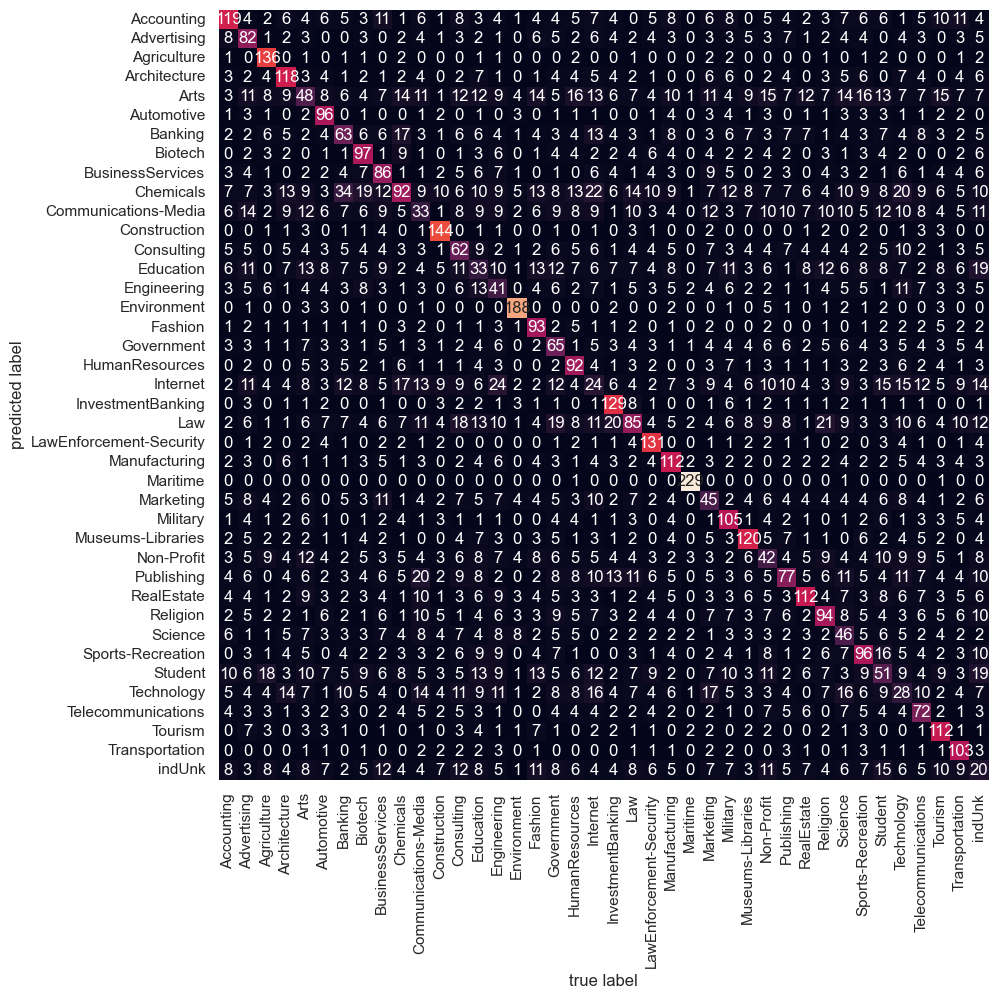

In [102]:
print_confusion_matrix(y_test, ypred_test_m3)


# Part B

• DOMAIN: Customer support  
• CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the year. 
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy 
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper 
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with 
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human 
support executive if the request is complex or not in it’s database.  
• DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.  
• PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:  
1. Start chat session with greetings and ask what the user is looking for. [5 Marks]
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]

In [129]:
import numpy as np
import random
import string
import bs4 as bs
import urllib.request
import nltk
import re
from nltk.stem.porter import PorterStemmer
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [130]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [131]:
with open(r'C:\Users\manve\Desktop\Great Learning\NLP\GL Bot.json', 'r') as f:
  intents = json.load(f)

In [132]:
def tokenize(sentence):
  return nltk.word_tokenize(sentence)

In [133]:
stemmer = PorterStemmer()
def stem(word):
  return stemmer.stem(word.lower()) 

In [134]:
def bag_of_words(tokenized_sentence, corpus):
  tokenized_sentence = [stem(w) for w in tokenized_sentence]
  
  bag = np.zeros(len(corpus), dtype=np.float32)
  for idx,w, in enumerate(corpus):
    if w in tokenized_sentence:
      bag[idx] = 1.0

  return bag

In [135]:
corpus = []
tags = []
xy = []

for intent in intents['intents']:
  tag = intent['tag']
  tags.append(tag)
  for pattern in intent['patterns']:
    w = tokenize(pattern)
    corpus.extend(w)
    xy.append((w, tag))

In [136]:
punctuations = ['?','!','.',',']

In [137]:
corpus = [stem(w) for w in corpus if w not in punctuations]
corpus = sorted(set(corpus))
tags = sorted(set(tags))

In [138]:
X_train = []
y_train = []

for (pattern_sentence, tag) in xy:
  bag = bag_of_words(pattern_sentence, corpus)
  X_train.append(bag)

  label = tags.index(tag)
  y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [139]:
class ChatDataset(Dataset):
  def __init__(self):
    self.n_samples = len(X_train)
    self.x_data = X_train
    self.y_data = y_train

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.n_samples

In [140]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out

In [141]:
#Hyperparameters
num_epochs = 1000
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)

In [142]:
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [143]:
model = NeuralNet(input_size, hidden_size, output_size)


In [144]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [145]:
# Train the model
for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)
        
        # Forward pass
        outputs = model(words)
        # if y would be one-hot, we must apply
        # labels = torch.max(labels, 1)[1]
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0486
Epoch [200/1000], Loss: 0.0040
Epoch [300/1000], Loss: 0.0015
Epoch [400/1000], Loss: 0.0005
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


In [146]:
data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"corpus": corpus,
"tags": tags
}
     


In [147]:
FILE = "data.pth"
torch.save(data, FILE)

In [148]:
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
corpus = data['corpus']
tags = data['tags']
model_state = data["model_state"]

In [149]:
model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=154, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=8, bias=True)
  (relu): ReLU()
)

In [150]:
bot_name = "Olympus"
print("Let's chat! (type 'quit' to exit)")
while True:
    # sentence = "do you use credit cards?"
    sentence = input("You: ")
    if sentence == "quit":
        break

    sentence = tokenize(sentence)
    X = bag_of_words(sentence, corpus)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)

    output = model(X)
    _, predicted = torch.max(output, dim=1)

    tag = tags[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.75:
        for intent in intents['intents']:
            if tag == intent["tag"]:
                print(f"{bot_name}: {random.choice(intent['responses'])}")
    else:
        print(f"{bot_name}: I do not understand...")

Let's chat! (type 'quit' to exit)
You: HI
Olympus: Hello! how can i help you ?
You: Hoe are you
Olympus: I hope I was able to assist you, Good Bye
You: How are you
Olympus: Hello! how can i help you ?
You: Need help in machine learning
Olympus: Link: Machine Learning wiki 
You: BUt I have doubt in deep learning also
Olympus: Link: Neural Nets wiki
You: thanks
Olympus: I hope I was able to assist you, Good Bye
You: sure
Olympus: Hello! how can i help you ?
You: thank you
Olympus: I hope I was able to assist you, Good Bye
You: yes
Olympus: Hello! how can i help you ?
You: Thank you bye
Olympus: I hope I was able to assist you, Good Bye
You: Quit
Olympus: Hello! how can i help you ?
You: quit
